In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [171]:
covid19 = pd.read_csv(r"C:\Users\Lenovo\Downloads\covid19.csv")

In [142]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10903 entries, 0 to 10902
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date                     10903 non-null  object
 1   Continent_Name           10903 non-null  object
 2   Two_Letter_Country_Code  10903 non-null  object
 3   Country_Region           10903 non-null  object
 4   Province_State           10903 non-null  object
 5   positive                 10903 non-null  int64 
 6   hospitalized             10903 non-null  int64 
 7   recovered                10903 non-null  int64 
 8   death                    10903 non-null  int64 
 9   total_tested             10903 non-null  int64 
 10  active                   10903 non-null  int64 
 11  hospitalizedCurr         10903 non-null  int64 
 12  daily_tested             10903 non-null  int64 
 13  daily_positive           10903 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1

In [143]:
covid19.shape

(10903, 14)

In [144]:
cols = covid19.columns.tolist()
type(cols)

list

In [145]:
covid19.describe(include = 'object')

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,Province_State
count,10903,10903,10903,10903,10903
unique,133,6,109,109,81
top,2020-05-05,North America,US,United States,All States
freq,142,6452,5032,5032,3781


In [146]:
covid19.head()

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,Province_State,positive,hospitalized,recovered,death,total_tested,active,hospitalizedCurr,daily_tested,daily_positive
0,2020-01-20,Asia,KR,South Korea,All States,1,0,0,0,4,0,0,0,0
1,2020-01-22,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
2,2020-01-22,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0
3,2020-01-23,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
4,2020-01-23,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0


The column Province_State has All States as well as individual states. The entries in the All States includes those that are not as well. 
So we will be considering only the entries with All States in our analysis.

In [147]:
covid19_allstates = covid19[covid19['Province_State'] == 'All States']

covid19_allstates.head()

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,Province_State,positive,hospitalized,recovered,death,total_tested,active,hospitalizedCurr,daily_tested,daily_positive
0,2020-01-20,Asia,KR,South Korea,All States,1,0,0,0,4,0,0,0,0
1,2020-01-22,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
3,2020-01-23,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
5,2020-01-24,Asia,KR,South Korea,All States,2,0,0,0,27,0,0,5,0
6,2020-01-24,North America,US,United States,All States,1,0,0,0,1,0,0,0,0


In [150]:
#removing column Province_State which is of no use as it will always have All States
covid19_allstates.drop('Province_State', axis = 1, inplace = True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14352\919641144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid19_allstates.drop('Province_State', axis = 1, inplace = True)


In [151]:
covid19_allstates.tail()

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,positive,hospitalized,recovered,death,total_tested,active,hospitalizedCurr,daily_tested,daily_positive
10898,2020-06-01,Asia,ID,Indonesia,0,0,0,0,223624,0,0,5887,0
10899,2020-06-01,Europe,PL,Poland,23987,0,11449,1065,931520,11473,0,15974,201
10900,2020-06-01,Europe,RS,Serbia,11430,0,6726,244,247760,4460,468,2315,18
10901,2020-06-01,Asia,TW,Taiwan,0,0,0,0,72319,0,0,237,0
10902,2020-06-01,Asia,VN,Vietnam,0,0,0,0,261004,0,0,0,0


We will be trying find the highest positive to tested ratio amongst the countries

In [152]:
#For testing related data, we will be using only the daily data and not cumulative data
covid19_allstates_daily.groupby("Country_Region").sum(["active", "hospitalizedCurr", "daily_tested", "daily_positive"])

,active,hospitalizedCurr,daily_tested,daily_positive
Country_Region,,,,
Albania,0,0,5794,374
Argentina,0,0,24263,1273
Armenia,119438,118645,58689,9492
Australia,134586,6655,1252900,7200
Austria,0,0,337293,5366
...,...,...,...,...
United Kingdom,0,0,1473672,166909
United States,0,0,17282363,1877179
Uruguay,0,0,4059,38


In [153]:
#Finding the top 10 countries who have highest testing rates
covid19_test_top10 = covid19_allstates_daily.groupby("Country_Region").sum(["active", "hospitalizedCurr", "daily_tested", "daily_positive"]).rename(columns={'daily_tested':'tested', 'daily_positive':'positive', 'hospitalizedCurr':'hospitalized'}).sort_values(by=['tested'], ascending = False).head(10)

In [154]:
covid19_test_top10

,active,hospitalized,tested,positive
Country_Region,,,,
United States,0,0,17282363,1877179
Russia,6924890,0,10542266,406368
Italy,6202214,1699003,4091291,251710
India,0,0,3692851,60959
Turkey,2980960,0,2031192,163941
Canada,56454,0,1654779,90873
United Kingdom,0,0,1473672,166909
Australia,134586,6655,1252900,7200
Peru,0,0,976790,59497


In [156]:
#Finding the positive to tested ratio for these countries
covid19_test_top10['positive_ratio'] = covid19_test_top10['positive']/covid19_test_top10['tested']

covid19_test_top10

,active,hospitalized,tested,positive,positive_ratio
Country_Region,,,,,
United States,0,0,17282363,1877179,0.108618
Russia,6924890,0,10542266,406368,0.038547
Italy,6202214,1699003,4091291,251710,0.061523
India,0,0,3692851,60959,0.016507
Turkey,2980960,0,2031192,163941,0.080712
Canada,56454,0,1654779,90873,0.054915
United Kingdom,0,0,1473672,166909,0.113261
Australia,134586,6655,1252900,7200,0.005747
Peru,0,0,976790,59497,0.060911


In [158]:
#Finding the top 3 countries with the highest positive/tested ratio
covid19_positive_rate_top3 = covid19_test_top10.sort_values(by = ["positive_ratio"], ascending = False).head(3)
covid19_positive_rate_top3

,active,hospitalized,tested,positive,positive_ratio
Country_Region,,,,,
United Kingdom,0,0,1473672,166909,0.113261
United States,0,0,17282363,1877179,0.108618
Turkey,2980960,0,2031192,163941,0.080712


In [159]:
covid19_allstates.tail()

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,positive,hospitalized,recovered,death,total_tested,active,hospitalizedCurr,daily_tested,daily_positive
10898,2020-06-01,Asia,ID,Indonesia,0,0,0,0,223624,0,0,5887,0
10899,2020-06-01,Europe,PL,Poland,23987,0,11449,1065,931520,11473,0,15974,201
10900,2020-06-01,Europe,RS,Serbia,11430,0,6726,244,247760,4460,468,2315,18
10901,2020-06-01,Asia,TW,Taiwan,0,0,0,0,72319,0,0,237,0
10902,2020-06-01,Asia,VN,Vietnam,0,0,0,0,261004,0,0,0,0


Now we are trying to find the countries with highest death counts

In [162]:
#Taking the necessary columns
covid19_state_deaths = covid19_allstates[['Date', 'Country_Region', 'death']]

covid19_state_deaths[(covid19_state_deaths['death'] == 0) & (covid19_state_deaths['Country_Region'] == 'Italy')]

,Date,Country_Region,death
4013,2020-04-06,Italy,0
4028,2020-04-06,Italy,0
4030,2020-04-06,Italy,0
4032,2020-04-06,Italy,0
4051,2020-04-06,Italy,0
4112,2020-04-06,Italy,0
4151,2020-04-07,Italy,0
4167,2020-04-07,Italy,0
4169,2020-04-07,Italy,0
4170,2020-04-07,Italy,0


Since the death column is cumulative, we can find the total number of deaths per country by finding the maximum value against each country

In [163]:
covid19_top3_deaths_states = covid19_state_deaths.groupby(['Country_Region']).agg('max').sort_values(by = ['death'], ascending = False).head(3)

covid19_top3_deaths_states


,Date,death
Country_Region,,
United States,2020-05-31,98536
Italy,2020-05-31,33415
United Kingdom,2020-05-13,33186


Here, I am going to draw a line chart to show how the number of deaths progressed in the top 3 countries

In [164]:
#Filtering out the data of the top 3 countries with highest deaths
top3_death_countries = covid19_top3_deaths_states.index.tolist()
covid19_deaths_top3 = covid19_state_deaths[covid19_state_deaths['Country_Region'].isin(top3_death_countries)]

#Due to some missing data in the middle the chart would appear distorted. The column is cumulative so we will remove the entries with 0 deaths 
#after the deaths had started to be recorded.
covid19_deaths_top3.drop(covid19_deaths_top3.loc[(covid19_deaths_top3['death']==0) & (covid19_deaths_top3['Date']>='2020-03-01')].index, inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14352\4143883872.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid19_deaths_top3.drop(covid19_deaths_top3.loc[(covid19_deaths_top3['death']==0) & (covid19_deaths_top3['Date']>='2020-03-01')].index, inplace=True)


In [166]:
#covid19_deaths_top3_permonth_grouped = covid19_deaths_top3_permonth.groupby(['Country_Region','monthyear']).agg('max').reset_index()
#
covid19_deaths_top3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 1 to 10830
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            331 non-null    object
 1   Country_Region  331 non-null    object
 2   death           331 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 10.3+ KB


In [169]:
#Converting the Date column to datetime format so that plotting can be done better

covid19_deaths_top3['Date'] = pd.to_datetime(covid19_deaths_top3['Date'])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14352\522926310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid19_deaths_top3['Date'] = pd.to_datetime(covid19_deaths_top3['Date'])


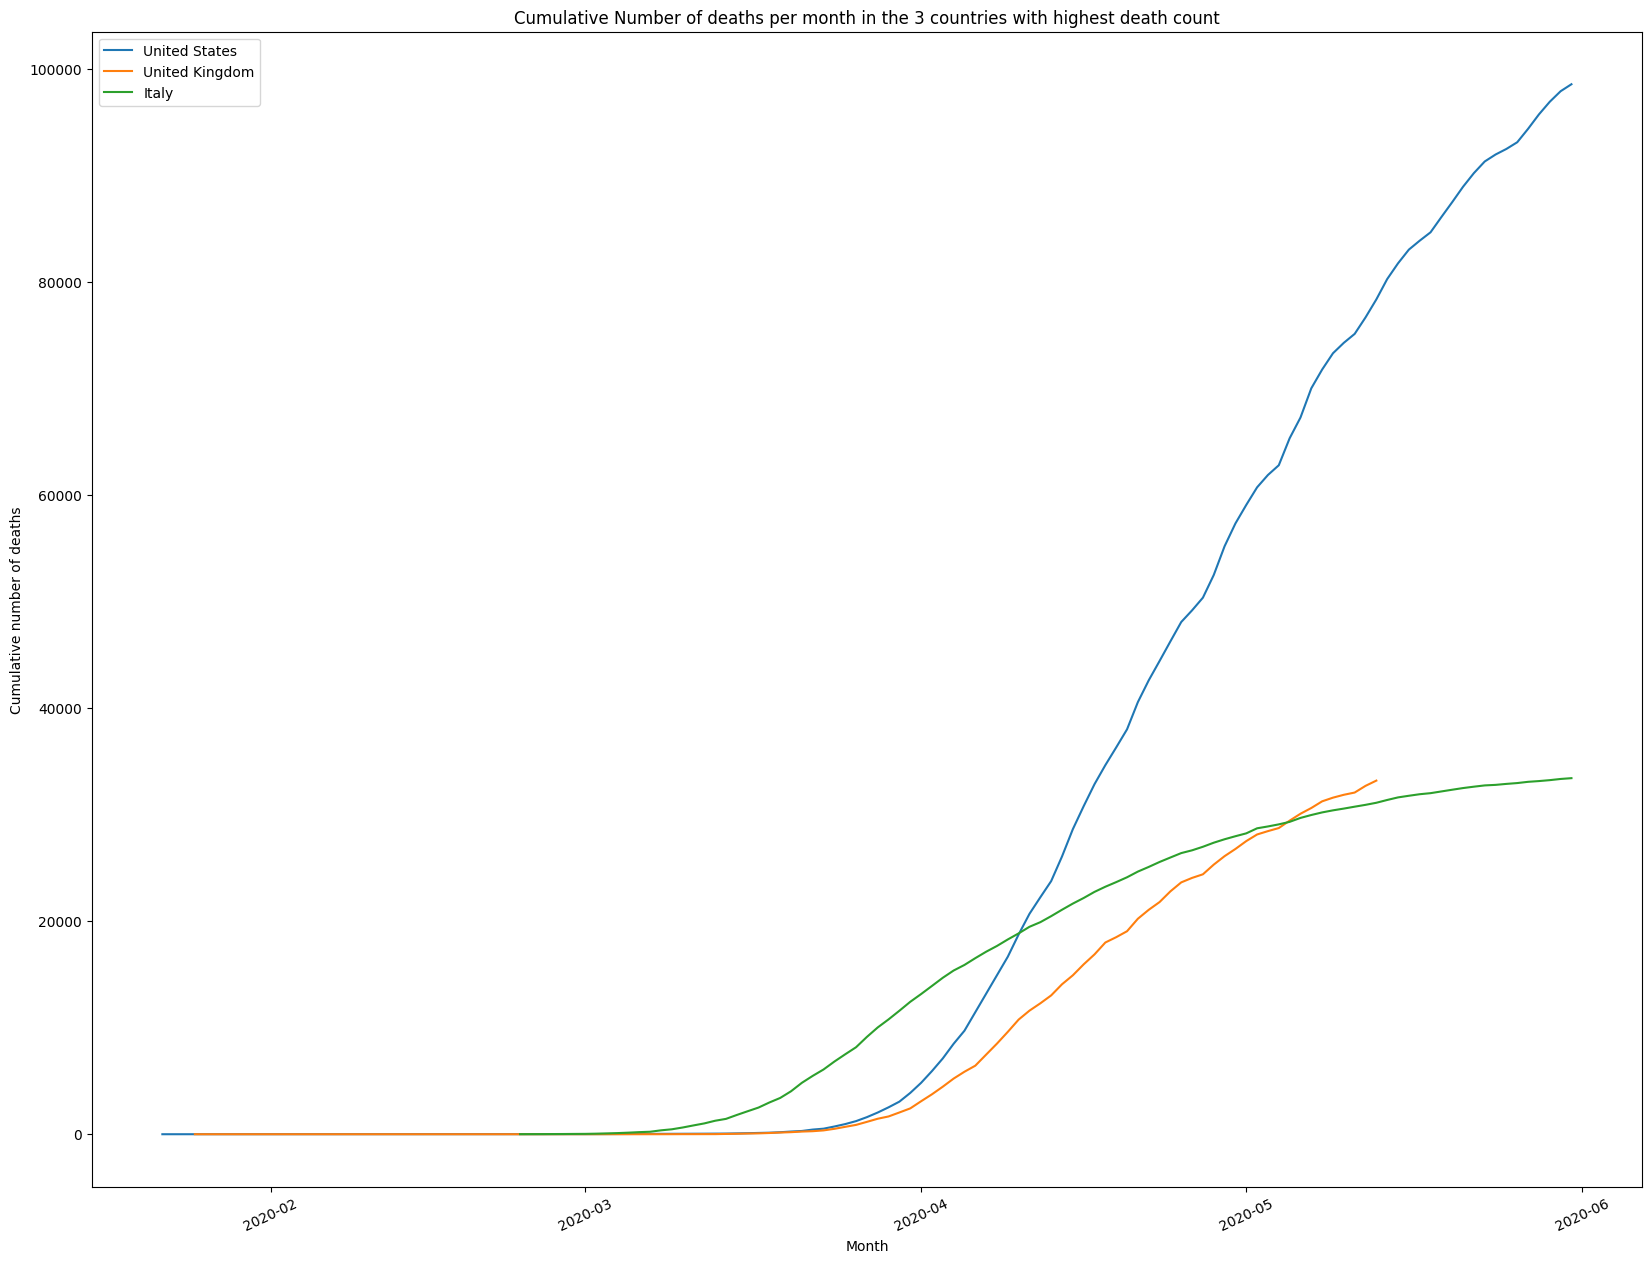

In [172]:
plt.figure(figsize = (20,15))
sns.lineplot(data = covid19_deaths_top3, x = 'Date', y = 'death', hue = 'Country_Region')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show ticks for each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the tick labels as desired

#Additional Formatting
plt.xticks(rotation = 25)
plt.xlabel("Month")
plt.ylabel("Cumulative number of deaths")
plt.title("Cumulative Number of deaths per month in the 3 countries with highest death count")
plt.legend()

plt.show()